# Distribución muestral de las medias
+ Un mariscal de campo lanzó:
    + 1 intercepción en su primer juego, 
    + 2 intercepciones en su segundo juego, 
    + 5 intercepciones en su tercer juego y después se retiró. 
+ Considere la población consistente en los valores 1, 2, 5. 
    + Observe que dos de los valores (1 y 5) son impares, de manera que la mediai en la población es **8/3**.

+ a.   Liste todas las muestras diferentes posibles de tamaño n 2 seleccionadas con reemplazo. 
    + Para cada muestra, calcule la media.
    + Utilice una tabla para representar la distribución muestral de las medias.
+ b.   Calcule la media de la distribución muestral de las medias.
+ c.   Para la población de 1, 2, 5, la media poblacional es: 8/3.
    + ¿La media de la distribución muestral de las medias también es igual a 8/3?   
    + ¿Las medias muestrales coinciden con el valor de la media poblacional? 
        + Es decir, ¿las medias de la muestra tienen una media igual a la mediai poblacional?


In [7]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from statistics import mean

a. Construcción de las muestras posibles del caso

In [8]:
# a. Create permutations of elements in data (ej 1, 2, 5) grouped by 2
# It also counts how many odd element are in each permutation.
# After, it print each permutation adding the mean in each tuple
# Permutations are with repetitions or replacement

# data
data=[1,2,5]
size_data = len(data)
grouped= sum(1 for numero in data if numero % 2 != 0)
tot_perm = size_data**grouped
print(f"Permutation with repetitions of {data} = {size_data} elements, grouped by {grouped}: {tot_perm} samples")

# Create permutation with replacement
permutationwrepeat = itertools.product(data, repeat=grouped)

rows= []
# Print each permutation whith replacement and the quantity of odds
for i, permutation in enumerate(permutationwrepeat):
    
    mean_sample = mean(permutation)
    rows.append({'index': i, 'sample': permutation, 'mean': mean_sample, 'P(sample)': 1/tot_perm })    

# Create DataFrame
df = pd.DataFrame(rows, columns=['index', 'sample', 'mean', 'P(sample)'])
df.set_index('index', inplace=True)
# df.reset_index(inplace=True)
print(df)
print(f"La media de las medias que aparecen en las muestras (mean) es igual a: {df['mean'].mean()}.")

Permutation with repetitions of [1, 2, 5] = 3 elements, grouped by 2: 9 samples
       sample  mean  P(sample)
index                         
0      (1, 1)   1.0   0.111111
1      (1, 2)   1.5   0.111111
2      (1, 5)   3.0   0.111111
3      (2, 1)   1.5   0.111111
4      (2, 2)   2.0   0.111111
5      (2, 5)   3.5   0.111111
6      (5, 1)   3.0   0.111111
7      (5, 2)   3.5   0.111111
8      (5, 5)   5.0   0.111111
La media de las medias que aparecen en las muestras (mean) es igual a: 2.6666666666666665.


+ a. En la tabla **df** se listan las nueve muestras diferentes posibles de tamaño **n=2** (sample), 
    + obtenidas con reemplazo de la población de 1, 2, 5, de tamaño igual a 3.
    + Esta tabla también contiene:
        + 'sample'        : los números (elementos) que componen la muestra.
        + 'mean' : **la media** de la muestra. (observe que varía según los valores de la muestra).
        + 'P(sample)': probabilidad de encontrar una muestra como esta entre todas las muestras posibles. (1/9)
    + Observe que: Como existen 9 muestras igualmente probables, cada muestra tiene una probabilidad de 1/9.
    + Observe que: **La media de las medias que aparecen en las muestras es igual a 8/3 (2.6666)**
        + Esta es una **media** que se calcula como la **𝜇=∑ 𝑥 / m**, dónde m es la cantidad de muestras (en este caso 9)
        + Con pandas dataframe se puede ver simplemente con df.describe()

b. Construcción de la distribución de frecuencias y probabilidades

In [9]:
# b. Create a summary and a grouped dataframe
# count how many times each quantity of odds can be found on all the samples.
summary_df = df.groupby('mean').size().reset_index(name='count')

# Agrupar por 'mean' y calcular 
grouped_df = df.groupby('mean').agg({
    'P(sample)': 'sum'
}).reset_index()
grouped_df['#rep']=summary_df['count']

print("Datos agrupados y sumarizados (grouped_df):")
grouped_df

Datos agrupados y sumarizados (grouped_df):


,mean,P(sample),#rep
0,1.0,0.111111,1
1,1.5,0.222222,2
2,2.0,0.111111,1
3,3.0,0.222222,2
4,3.5,0.222222,2
5,5.0,0.111111,1


+ b. En la tabla **grouped_df** se resumen los resultados de las muestras que se pueden tomar.
    + Esto es porque la media que puede encotrarse al tomar cada muestra puede variar.
        + En las 9 muestras que se pueden sacar, se pueden encontar medias que varían entre 1 y 5.
        + En resumen, se pueden tomar 9 muestras distintas:
            + Hay sólo una muestra dónde las medias serán 1, 2 y 5.
            + En dos muestras las medias valdrán 1.5, 3 y 3.5.
    + La tabla df, nos da el detalle.
    + La tabla summary_df nos da el resumen.

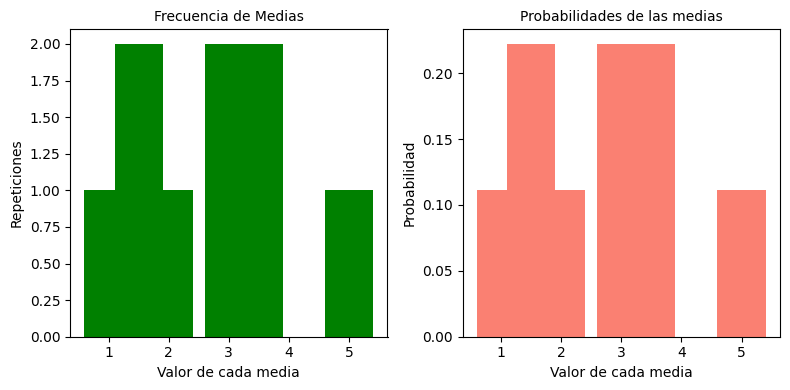

In [10]:

# b. Plotting the histograms
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True)

# First subplot for count
axes[0].bar(grouped_df['mean'], grouped_df['#rep'], color='green')
axes[0].set_ylabel('Repeticiones')
axes[0].set_xlabel('Valor de cada media',fontsize=10)
axes[0].set_title('Frecuencia de Medias', fontsize=10)

# Second subplot for percentage
axes[1].bar(grouped_df['mean'], grouped_df['P(sample)'], color='salmon')
axes[1].set_ylabel('Probabilidad')
axes[1].set_xlabel('Valor de cada media',fontsize=10)
axes[1].set_title('Probabilidades de las medias', fontsize=10)

plt.tight_layout()
plt.show()


+ b. Frecuencias de Impares y probabiliddes de impaeres
+ El gráfico de frecuencias nos da las cantidades de medias que pueden encontrarse dentro de la muestra en el total de las muestras.
    + Si miramos la frecuencias vemos:
        + La media vale 1 2 y 5 una vez cada una respectivamente.
        + 2 veces la media vale 1.5, 3 y 3.5.
        + La media nunca vale 2.5, 4 o 4.5.
        + Eje y: Repeticiones o cantidad de veces que se repita la cantidad de impares.
        + Eje x: Cantidad de impares que pueden encontrarse dentro de una muestra.
+ El grafico de proporciones nos da la probabilidad de encontrar una una determinada media dentro del total de las muestras.
    + Si obsevamos las probabilidades vemos:
        + 0.111111 es la probabilidad de encontrar medias que valen 1, 2 y 5, dentro de las 9 muestras.
        + 0.222222 es la probabilidad de encontrar medias que valen 1.5, 3 y 3.5,  dentro de las 9 muestras.
        + 0.000000 es la probabilidad de encontrar medias que valen 2.5, 4 y 4.5, dentro de las 9 muestras.
        + Eje y: La suma de las probabilidaddes da 1 como debe ser.
        + Eje x: Tiene los valores posibles de medias para cada muestra.

+ C. ¿La media de la distribución muestral de las medias también es igual a 8/3?
    + Calculamos la media
        + 1. sumaproducto de todas las medias por la probabilidad de encontrar esas medias.
        + En este caso la media se ve a simple vista porque:
            + recordamos que la media de una distribución es : 𝜇=∑〖[𝑥 . 𝑃(𝑥)]〗

In [11]:
grouped_df

,mean,P(sample),#rep
0,1.0,0.111111,1
1,1.5,0.222222,2
2,2.0,0.111111,1
3,3.0,0.222222,2
4,3.5,0.222222,2
5,5.0,0.111111,1


In [12]:

sumaproducto = (grouped_df['mean']* grouped_df['P(sample)'])
media_proporcion_de_impares=sumaproducto.sum()
print(f"El producto de las medias dentro de cada muestra por la probabilidad de obtener esa media es:\n{sumaproducto}-")
print(f"La media de las medias aparecen en las muestras (#odds/data) es igual a: {media_proporcion_de_impares}.")


El producto de las medias dentro de cada muestra por la probabilidad de obtener esa media es:
0    0.111111
1    0.333333
2    0.222222
3    0.666667
4    0.777778
5    0.555556
dtype: float64-
La media de las medias aparecen en las muestras (#odds/data) es igual a: 2.666666666666666.


#### Conclusiones
1. El la definición de este problema al ver los datos [1, 2, 5] se observa que la media es 0.66666 o 8/3.
2. En el punto a, al armar la tabla de datos se observa que la media de las medias de las muestras es 8/3.
2. En el punto c, se revisa la media de las medias y una vez mas se observa que la media de las proporciones es 8/3.
+ Por lo tanto, **las medias muestrales tienden a coincidir con la media poblacional** 

_____________________________________________________________________________________________________________________________________________________________